##  Практика 9. Кластерізація

Детальніше можна почитати [тут](https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/) та 
[тут](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).   Спочатку завантажимо необхідні бібліотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist,cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from collections import Counter

### Приклад 1.  ''Прості методи''. 

Розгянемо спочатку ієархічну кластерізацію. 

Розглянемо Приклади 14.3.2(а,b) та 14.3.3  (див. Таблицю 14.1) з Rencher. В таблиці зображені дані по кримінальній ситуації в наступних місцях.  Для простоти ми просто пронумеруємо стовбчики. 

In [3]:
df = pd.read_table('T14_1_CITYCRIME.DAT', header = None)
print(df) 

             0     1     2      3    4     5     6     7      8
0      Atlanta   NaN  16.5   24.8  106   147  1112   905  494.0
1       Boston   NaN   4.2   13.3  122    90   982   669  954.0
2      Chicago   NaN  11.6   24.7  340   242   808   609  645.0
3       Dallas   NaN  18.1   34.2  184   293  1668   901  602.0
4       Denver   NaN   6.9   41.5  173   191  1534  1368  780.0
5      Detroit   NaN  13.0   35.7  477   220  1566  1183  788.0
6     Hartford   2.5   8.8   68.0  103  1017   724   468    NaN
7     Honolulu   3.6  12.7   42.0   28  1457  1102   637    NaN
8      Houston   NaN  16.8   26.6  289   186  1509   787  697.0
9           KC   NaN  10.8   43.2  255   226  1494   955  765.0
10          LA   NaN   9.7   51.8  286   355  1902  1386  862.0
11          NO   NaN  10.3   39.7  266   283  1056  1036  776.0
12          NY   NaN   9.4   19.4  522   267  1674  1392  848.0
13    Portland   5.0  23.0  157.0  144  1530  1281   488    NaN
14      Tucson   NaN   5.1   22.9   85  

Візьмемо перші 6 місць та виконаємо кластерізацію різними методами. 

In [4]:
df1 = pd.read_table('T14_1_CITYCRIME.DAT', nrows = 6, usecols=[0, 2,3,4,5,6,7,8],  \
                    names=['city', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7'])
df1

,city,c1,c2,c3,c4,c5,c6,c7
0,Atlanta,16.5,24.8,106,147,1112,905,494
1,Boston,4.2,13.3,122,90,982,669,954
2,Chicago,11.6,24.7,340,242,808,609,645
3,Dallas,18.1,34.2,184,293,1668,901,602
4,Denver,6.9,41.5,173,191,1534,1368,780
5,Detroit,13.0,35.7,477,220,1566,1183,788


Спочатку проіндексуємо множину за містами. 

In [5]:
df1 = df1.set_index('city') 
df1

,c1,c2,c3,c4,c5,c6,c7
city,,,,,,,
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788


Тепер обчислими відстань між містами, використовуючи евклідову метрику в просторі розмірності 7 (у нас 7 параметрів). 

In [6]:
pdist(df1, 'euclidean')

array([ 536.6419104 ,  516.37004173,  590.17532988,  693.57411284,
        716.19624406,  447.40330799,  833.07083732,  914.97843144,
        881.0858074 ,  924.00351731, 1073.39476895,  971.52712777,
        527.66725311,  464.46771685,  358.66537329])

Перетворимо ці дані в квадратну матрицю, елементами якої є відстані між містами. Округлимо  ці відстані до 1 знаку після коми. 

In [7]:
dist1 = pd.DataFrame(squareform(pdist(df1, 'euclidean')), columns=df1.index.values, index=df1.index.values).round(decimals = 1)
dist1

,Atlanta,Boston,Chicago,Dallas,Denver,Detroit
Atlanta,0.0,536.6,516.4,590.2,693.6,716.2
Boston,536.6,0.0,447.4,833.1,915.0,881.1
Chicago,516.4,447.4,0.0,924.0,1073.4,971.5
Dallas,590.2,833.1,924.0,0.0,527.7,464.5
Denver,693.6,915.0,1073.4,527.7,0.0,358.7
Detroit,716.2,881.1,971.5,464.5,358.7,0.0


Зробимо тепер кластеразацію **методом найближчого сусіда (single linkage)**. В цьому методі  ми обчислюємо відстань між кластерами наступним чином: 
$$ 
	D(A,B)= \min d(y_i,y_j): \quad y_i\in A, \quad y_j\in B\}, 
$$
Два кластери, у яких $D(A,B)$  мінімальне, об'єднуют в один. 
    
Побудуємо дендрограму методом найближчого сусіда.

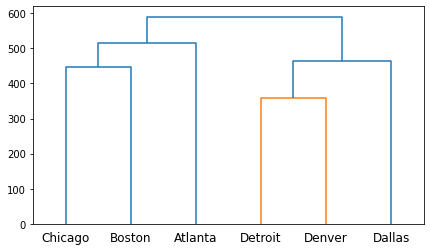

In [8]:
linked = linkage(df1, 'single')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Перерахуємо кластери в порядку групування: 
    
1. $C_1 = \{$ Detroit, Denver$\}$,

2. $C_2 = \{$ Chicago, Boston$\}$,

3. $C_3 = \{$ $C_1$, Dallas$\}$,

4. $C_4 = \{$ $C_2$, Athlanta$\}$, 

5. $C_3 = \{$ $C_3$, $C_3 \}$. 

Порівняємо результати з кластерізацієй методами найшвидшого сусіда, усереднення,   ['complete', 'average', 'centroid', 'ward'] Див. [тут](https://github.com/scipy/scipy/blob/v1.8.0/scipy/cluster/hierarchy.py#L837-L1081)


	
**Метод найшвидшого сусіда (fastest neighbour method).** 
	
$$ 
D(A,B)= \max\{ d(y_i,y_j): \quad y_i\in A, \quad y_j\in B\}, 
$$
Два кластери, у яких $D(A,B)$  мінімальне, об'єднуют в один. 
	
**Метод середньої відстані (average linkage  method).**  
	
$$ 
D(A,B)= \frac{1}{n_A n_B} \sum_{i=1}^{n_A} \sum_{j=1}^{n_B}  d(y_i,y_j). 
$$
Так само: два кластери, у яких  відстань  $D(A,B)$  мінімальна, об'єднуют в один. 
	
	
**Метод центроїда (centroid   method).**  
	
$$ 
D(A,B)= d(\bar{y}_A, \bar{y}_B), \quad \bar{y}_A :=
	\frac{1}{n_A} \sum_{i=1}^{n_A} y_{i}.
$$
Об'єднуємо в один  два кластери, у яких  відстань  $D(A,B)$  мінімальна, та обираємо новий центр за формулою 
$$
\bar{y}_{AB} =\frac{n_A \bar{y}_A + n_B \bar{y}_B}{n_A+n_B}. 
$$

**Метод Варда.**

Метод Варда полягає в тому, щоб з'єднувати два кластери, у яких відстань 
$$
	I_{AB}= SSE_{AB}- (SSE_A + SSE_B)= \frac{n_A n_B}{n_A + n_B} (\bar{y}_A- \bar{y}_B)' (\bar{y}_A- \bar{y}_B). 
$$
є мінімальною. 
Тут
$$
SSE_A := \sum_{i=1}^{n_A} (y_i - \bar{y}_A)'(y_i - \bar{y}_A), 
$$
$$
SSE_B := \sum_{i=1}^{n_B} (y_i - \bar{y}_B)'(y_i - \bar{y}_B), 
$$
$$
SSE_{AB} := \sum_{i=1}^{n_{AB}} (y_i - \bar{y}_{AB})'(y_i - \bar{y}_{AB}). 
$$

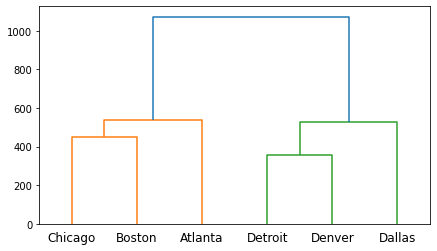

In [9]:
linked = linkage(df1, 'complete')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

При цьому  розбиття на кластери таке саме, як і при кластерізації методом найближчого сусіда. 

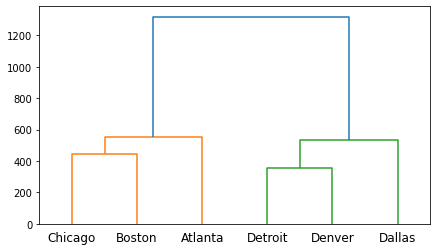

In [10]:
linked = linkage(df1, 'ward')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Зобразимо на одній картинці дендрограми, побудовані різними способами. Більше про методи: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [11]:
df1

,c1,c2,c3,c4,c5,c6,c7
city,,,,,,,
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788


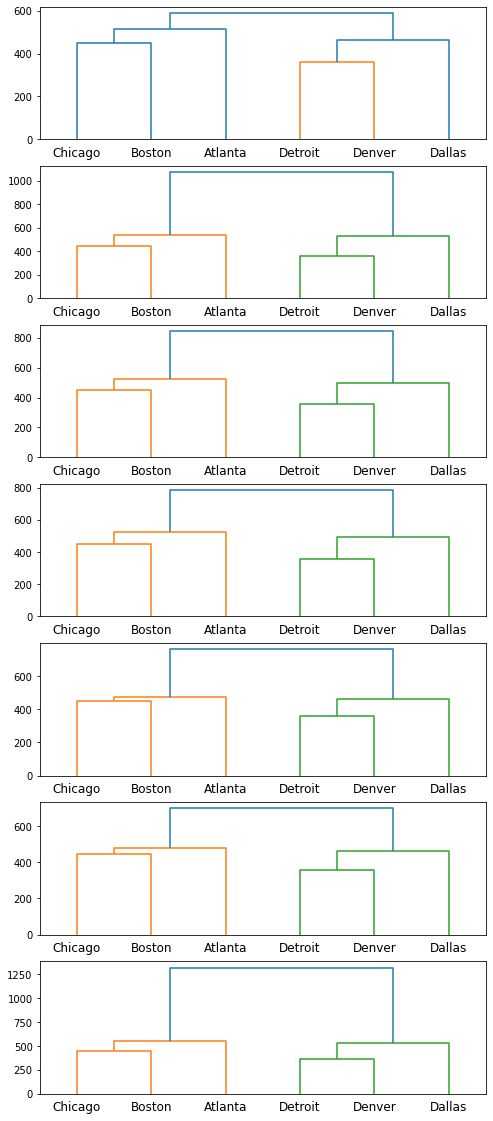

In [12]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axs = plt.subplots(len(methods),1, figsize=(8,20))

for i in range(len(methods)):
    dendrogram(linkage(df1, method=methods[i]), ax = axs[i], labels=df1.index.values,
            distance_sort='descending') 

Відстані різні, дендрограми однакові.

### Приклад 2. $K$-means.

Перейдемо тепер до методу середніх KMeans. Застосуємо цей метод на df1. При цьому ми оберемо 3 кластери. 

In [13]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=10, random_state=2)
kmeans.fit(df1)

KMeans(max_iter=10, n_clusters=3, random_state=2)

Отже, ми віднесли Даллас, Денвер і Детройт до першого кластеру, Бостон і Чікаго до другого, і Атланту до третього: 

In [14]:
y_kmeans = kmeans.predict(df1)
y_kmeans

array([0, 2, 2, 1, 1, 1])

In [15]:
print(kmeans.labels_)

[0 2 2 1 1 1]


Класифікуємо тепер Хьюстон і КС (Канзас сіти):

In [16]:
df4 = pd.read_table('T14_1_CITYCRIME.DAT', nrows =10, usecols=[0, 2,3,4,5,6,7,8],  \
                    names=['city', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7'])
df4 = df4.set_index('city') 
df5= df4.loc['Houston':'KC',:]
df5

,c1,c2,c3,c4,c5,c6,c7
city,,,,,,,
Houston,16.8,26.6,289,186,1509,787,697.0
KC,10.8,43.2,255,226,1494,955,765.0


In [17]:
predicted_class = kmeans.predict(df5)
print(predicted_class)

[1 1]


Отже, ми класифікували ці міста в першу групу. 

З'ясуємо, як обрати оптимальну кількість кластерів в методі $k$ середніх. Розглянемо ''метод локтя'' (elbow method). Див., наприклад, 
[тут](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/). 

Розглянемо повну таблицю. Ми відкидаємо останню колонку, оскільки деякі дані там не визначені. 

In [18]:
df6 = pd.read_table('T14_1_CITYCRIME.DAT',  usecols=[0,2,3,4,5,6,7],  \
                    names=['city','c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
df6 = df6.set_index('city') 
df6

,c1,c2,c3,c4,c5,c6
city,,,,,,
Atlanta,16.5,24.8,106,147,1112,905
Boston,4.2,13.3,122,90,982,669
Chicago,11.6,24.7,340,242,808,609
Dallas,18.1,34.2,184,293,1668,901
Denver,6.9,41.5,173,191,1534,1368
Detroit,13.0,35.7,477,220,1566,1183
Hartford,8.8,68.0,103,1017,724,468
Honolulu,12.7,42.0,28,1457,1102,637
Houston,16.8,26.6,289,186,1509,787


Обчислимо при кожному $k$

1. Середній квадрат відстані елементів від центрів кластерів. Для цього оберемо евклідову метрику. Цей параметр називається Distortion;
2. Суми квадратів відстаней від елементів до найближчого кластеру. Цей параметр називається Inertias. 

In [19]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df6)
    kmeanModel.fit(df6)

    distortions.append(sum(np.min(cdist(df6, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df6.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df6, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df6.shape[0]
    mapping2[k] = kmeanModel.inertia_


Наведемо ці значення та побудуємо відповідні графіки. 

In [20]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 655.3429259128797
2 : 397.9223475693735
3 : 291.40641554404067
4 : 240.68464688688738
5 : 200.93250091850197
6 : 169.67512954683698
7 : 142.35876450768654
8 : 121.69738937336592
9 : 105.50026029342224


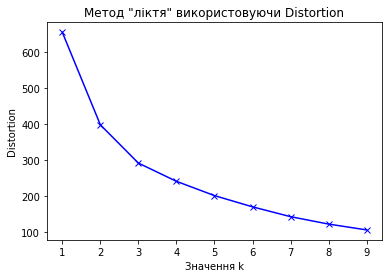

In [21]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Значення k')
plt.ylabel('Distortion')
plt.title('Метод "ліктя" використовуючи Distortion')
plt.show()


In [22]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 7919202.096875
2 : 2908523.570833333
3 : 1493221.5689285714
4 : 1096209.3274999997
5 : 761780.7766666666
6 : 585682.735
7 : 444265.4
8 : 347042.7766666667
9 : 253333.76333333334


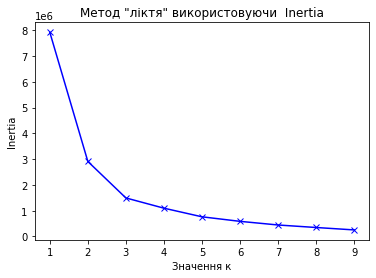

In [23]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Значення к')
plt.ylabel('Inertia')
plt.title('Метод "ліктя" використовуючи  Inertia')
plt.show()

Як ми бачимо, при $k=3$ відбувається злам кривої. Тому оберемо 3 кластери. Наведемо ті міста, які входять к кластери на $k$-му кроці. 

In [24]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df6)
    print(kmeanModel.fit(df6).labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0]
[2 2 2 1 1 1 0 0 1 1 1 2 1 0 2 0]
[0 0 0 3 2 2 1 1 3 3 2 0 2 1 0 1]
[2 2 2 3 0 0 4 1 3 3 0 2 0 1 2 1]
[3 3 3 1 2 2 5 0 1 1 2 3 2 0 3 4]
[5 2 2 0 3 3 4 1 0 0 3 5 3 1 5 6]
[6 2 2 4 0 0 5 3 4 4 7 6 0 3 6 1]
[2 7 7 1 6 3 5 4 1 1 8 2 3 4 2 0]


In [25]:
cluster = np.array([[0]*16 for k in range(10)])
# cluster[9,:]

In [26]:
for k in K:
    cluster[k,:] = KMeans(n_clusters=k).fit(df6).labels_ 
print(cluster)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 0 2 2 2 1 1 2 2 2 0 2 1 0 1]
 [0 0 0 3 2 2 1 1 3 3 2 0 2 1 0 1]
 [3 3 3 2 0 0 1 4 2 2 0 3 0 4 3 4]
 [3 3 3 0 2 2 5 1 0 0 2 3 2 1 3 4]
 [0 6 6 3 2 2 4 1 3 3 2 0 2 1 0 5]
 [2 2 7 4 0 0 5 1 4 4 6 2 0 1 2 3]
 [6 2 2 0 8 3 4 1 0 0 7 6 3 1 6 5]]


Склеємо таблички в одну: 

In [27]:
df_new = pd.concat([pd.DataFrame(df6.index), pd.DataFrame(cluster.T, dtype = int)], axis=1)
df_new

,city,0,1,2,3,4,5,6,7,8,9
0,Atlanta,0,0,1,0,0,3,3,0,2,6
1,Boston,0,0,1,0,0,3,3,6,2,2
2,Chicago,0,0,1,0,0,3,3,6,7,2
3,Dallas,0,0,1,2,3,2,0,3,4,0
4,Denver,0,0,1,2,2,0,2,2,0,8
5,Detroit,0,0,1,2,2,0,2,2,0,3
6,Hartford,0,0,0,1,1,1,5,4,5,4
7,Honolulu,0,0,0,1,1,4,1,1,1,1
8,Houston,0,0,1,2,3,2,0,3,4,0
9,KC,0,0,1,2,3,2,0,3,4,0


Про ці методи кластерізації і більше: https://machinelearningmastery.com/clustering-algorithms-with-python/  Тут є посилання на оригінали статей!

### 2. Кластерізація методом сумішей. 

Розглянемо тепер кластерізацію за допомогою методу сумішей. Див https://www.datatechnotes.com/2022/07/clustering-example-with-gaussian.html 

Генеруємо дані за допомогою make_blobs. Тут 5 блоків нормальних випадкових величин, к центрів (обрані випадково), стандартне відхилення для  кожного блоку 1.84.  $X$:  вибірка, $y$: мітки.  

In [28]:
np.random.seed(234)
x, y = make_blobs(n_samples=330, centers=5, cluster_std=1.84)

Тепер зробимо підгонку до гаусівської моделі: 
$$
h(\boldsymbol{y})= \sum_{i=1}^g \alpha_i f(\boldsymbol{y},\boldsymbol{\mu}_i,\Sigma_i), 
$$
Ми використаємо  GaussianMixture: 
https://docs.huihoo.com/scikit-learn/0.20/modules/generated/sklearn.mixture.GaussianMixture.html

Якщо ми не задаємо вагу самостійно, то спочатку робиться кластерізація за методом Kmeans, і вага береться як відності частоти належності до кластеру, (тобто кількість елементів в кластері поділити на кількість всіх елементів). 

In [29]:
gm = GaussianMixture(n_components=5, verbose = 3).fit(x)

Initialization 0
Initialization converged: True	 time lapse 0.02600s	 ll -5.52335


Параметри: 

In [30]:
gm.get_params() 

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 3,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

Знайдемо центри: 

In [31]:
centers = gm.means_
print(centers)

[[-5.55839384  3.87288254]
 [ 7.28633633  2.54355009]
 [-9.1828898  -4.4785241 ]
 [ 8.10880025  9.23182354]
 [-0.90236602  0.16316915]]


І вагу: 

In [32]:
weights = gm.weights_
print(weights)

[0.18255976 0.18833006 0.20265624 0.20671987 0.21973407]


Зобразимо тепер дані та центри:

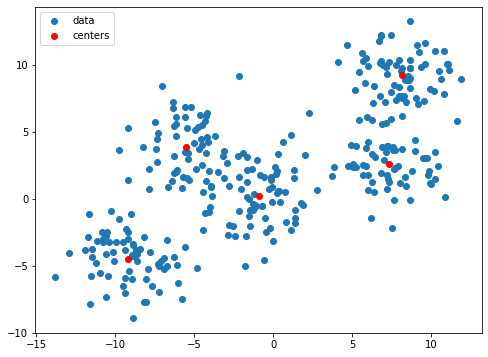

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

Тепер виконаємо кластерізацію. Далі  відносимо спостереження до того кластеру, де максимальне 
$$
\alpha_i f(\boldsymbol{y},\boldsymbol{\mu}_i,\Sigma_i).
$$
Тут $\alpha_i$ - це ті ваги, які ми отримали в weights (в даному випадку- абсолютні частоти, але відповідь залежить від того, як обирати початкові центри кластерів). 

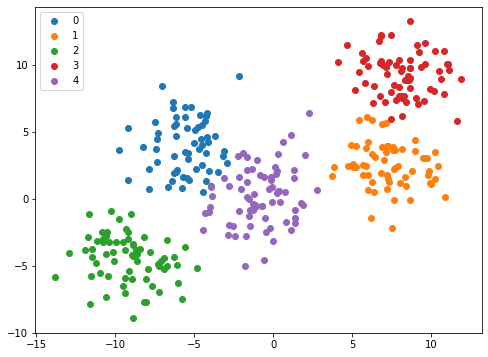

In [34]:
pred_gm = gm.predict(x)

df = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred_gm})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label = name)

ax.legend()
plt.show()

Покроково, ця кластерізація проходить наступним чином (від 2х кластерів до 5):

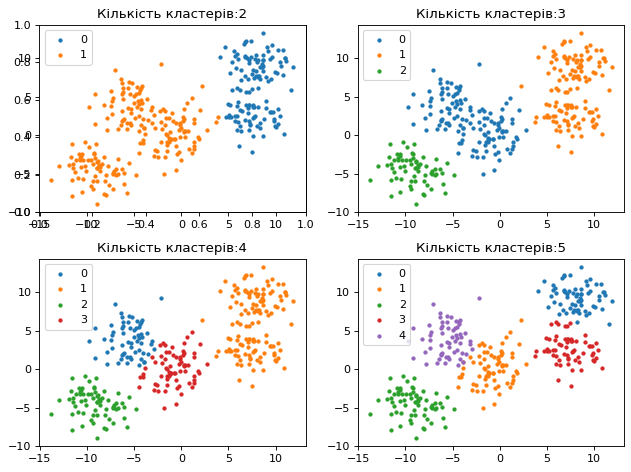

In [35]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Кількість кластерів:" + str(i))
        plt.legend()
plt.tight_layout()        
plt.show()  

In [36]:
km = KMeans(n_clusters=5, n_init = 1)
km.fit_predict(x)
labels = km.labels_
centroids = km.cluster_centers_
print(centroids)

[[-5.61890844  4.00400601]
 [ 8.02646621  9.17027964]
 [-0.96086974  0.09197425]
 [-9.17781267 -4.48596809]
 [ 7.31645635  2.44566181]]


Трохи інші, ніж були:

In [37]:
print(centers)

[[-5.55839384  3.87288254]
 [ 7.28633633  2.54355009]
 [-9.1828898  -4.4785241 ]
 [ 8.10880025  9.23182354]
 [-0.90236602  0.16316915]]


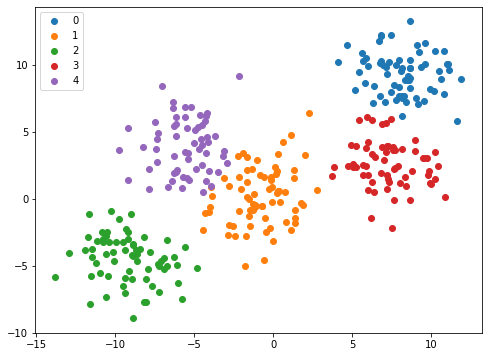

In [38]:
pred_km = km.predict(x)

df1 = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred_km})
groups1 = df1.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label= name)

ax.legend()
plt.show()

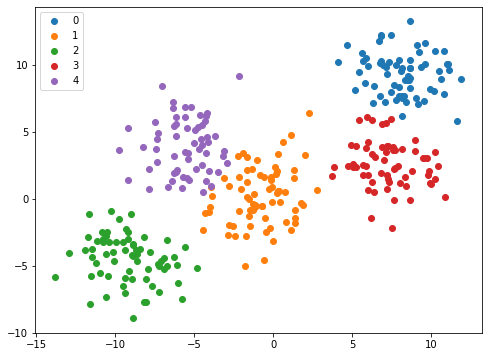

In [39]:
pred_gm = gm.predict(x)

df = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred_gm})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label = name)

ax.legend()
plt.show()

In [40]:
km.get_params() 

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 1,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [41]:
cluster_counts_km = Counter(pred_km)
print(sorted(cluster_counts_km.items(),key = lambda i: i[0]))

[(0, 59), (1, 70), (2, 73), (3, 67), (4, 61)]


Порівняємо з кількістю елементів, що отримано за допомогою сумішей: 

In [42]:
cluster_counts_mix = Counter(pred_gm)
print(sorted(cluster_counts_mix.items(),key = lambda i: i[0]))

[(0, 67), (1, 72), (2, 67), (3, 63), (4, 61)]


Увага! Кластери утворюються не в однаковому порядку! Тому треба слідкувати, щоб от таке впорядкування сортуванням давало однакові групи в обох випадках. Тобто в принципі ще треба прописати впорядкування, перед тим, як порівнювати. Але тут вже видно, що різні методи утворюють різні кластери, кількості елементів не співпадають! 

###  Інше: 

Застосування методу $k$  середніх для стискання зображень  і не тільки  (див.  [тут](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html))

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#hdbscan

Приклад з іншими центрами і дисперсією. 

In [43]:
np.random.seed(123)
x1, y1 = make_blobs(n_samples=330, centers=6, cluster_std=2.5)

Картинка: 

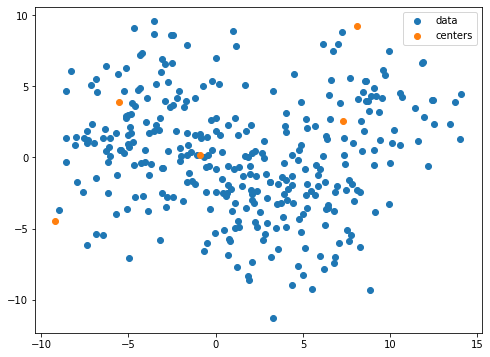

In [44]:
plt.figure(figsize=(8, 6))

plt.scatter(x1[:,0], x1[:,1], label="data")
plt.scatter(centers[:,0],centers[:,1],  label="centers")
plt.legend()
plt.show() 

Зробимо кластерізацію методом $k$means. 

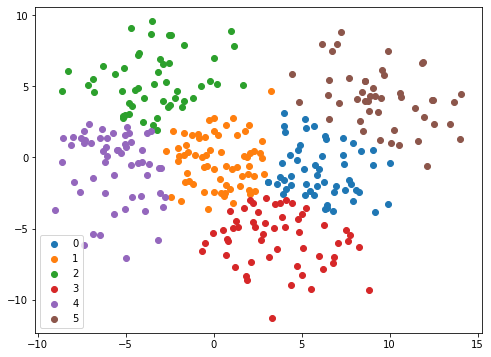

In [45]:
km2 = KMeans(n_clusters=6, n_init = 1)
pred_km2 = km2.fit_predict(x1)
labels2 = km2.labels_

df2 = pd.DataFrame({'x':x1[:,0], 'y':x1[:,1], 'label':pred_km2})
groups2 = df2.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups2:
    ax.scatter(group.x, group.y, label= name)

ax.legend()
plt.show()

In [46]:
cluster_counts_km2 = Counter(pred_km2)
print(sorted(cluster_counts_km2.items(),key = lambda i: i[0]))

[(0, 55), (1, 66), (2, 51), (3, 55), (4, 56), (5, 47)]


Тепер зробимо кластерізацію методом сумішей. 

In [47]:
gm3 = GaussianMixture(n_components=6, verbose = 0).fit(x1)

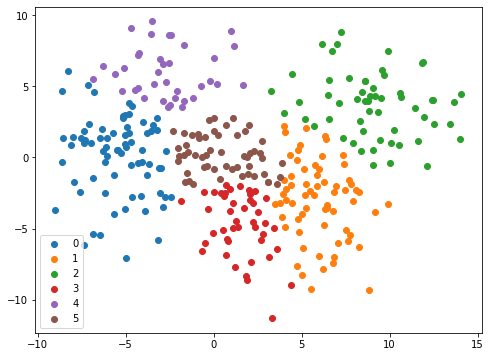

In [48]:
pred_gm3 = gm3.predict(x1)

df3 = pd.DataFrame({'x':x1[:,0], 'y':x1[:,1], 'label':pred_gm3})
groups3 = df3.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups3:
    ax.scatter(group.x, group.y, label = name)

ax.legend()
plt.show()

Покроково: 

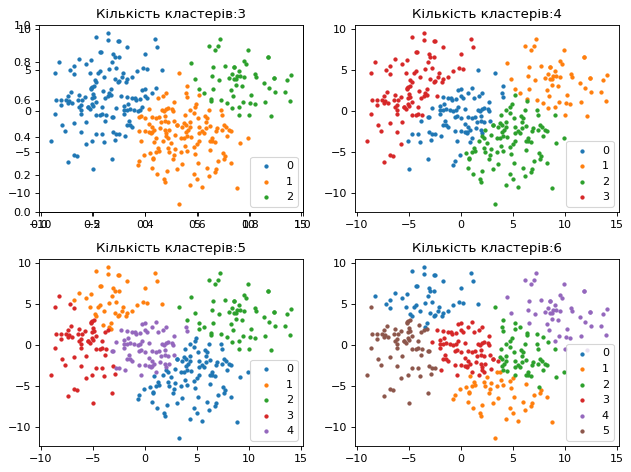

In [69]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    G = GaussianMixture(n_components = i+1).fit(x1)
    pred4 = G.predict(x1)
    df4 = pd.DataFrame({'x':x1[:,0], 'y':x1[:,1], 'label4': pred4})
    groups4 = df4.groupby('label4')
    f.add_subplot(2, 2, i-1)
    for name, group in groups4:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Кількість кластерів:" + str(i+1))
        plt.legend()
plt.tight_layout()        
plt.show()  